<a href="https://colab.research.google.com/github/VladProgram/ML_HW/blob/main/IrisClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Process Demo (Iris Classification) with Scikit-Learn KNeighborsClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
##A = [ 2, 3, 4]
#print(A)
#B = np.array([[1, 2],[3, 4]])
#print(B)

## The problem

Classificate an Iris flower as 'setosa' or 'versicolor' or 'virginica' (the **target** classes), based on its 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm) (the **features**).

We have some data about Iris flowers, collected in the famous [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).  

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).  

And 4 features are used to make that classification:  the length and the width of the sepals and petals, in centimeters.  

![Parts of the Iris Flower](https://github.com/geekcourses/ML_SA-Slides/blob/main/pages/themes/introduction_to_machine_learning/examples/images/the_three_types_of_Iris.png?raw=1)

## Prepare the data

### Load the data

Scikit Learn provides several Toy datasets: http://scikit-learn.org/stable/datasets/index.html#toy-datasets  

So, we'll just get the dataset from it.

In [2]:
# Load the data
iris = datasets.load_iris()

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Toy Iris Plants dataset description: http://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset

### Get insight of the data (Prepare and clean)

####  Look at what we have

In [5]:
# look at the structure:
print(f'feature_names: {iris.feature_names}')
print(f'data shape: {iris.data.shape}')
print(f'data: {iris.data[:3,:]}')
print(f'target_names: {iris.target_names}')
print(f'target shape: {iris.target.shape}')
print(f'target: {iris.target}')

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data shape: (150, 4)
data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
target_names: ['setosa' 'versicolor' 'virginica']
target shape: (150,)
target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Make a DataFrame object

Let's get it as a DataFrame, to ease the data insights. Of course, the sklearn Bunch object is perfectly suited for the calculations, but we just want to play and look:

In [6]:
# get the data
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

# # add the 'target' column at the end
iris_df['target'] = iris.target
iris_df.head(5)

# # lets look at the data, grouped by 'target' values
# iris_df.groupby('target').mean().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### get some stats

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
min_values = iris_df.groupby('target').min()
max_values = iris_df.groupby('target').max()

pd.concat([min_values, max_values], keys=['min', 'max'])

sepal length (cm)  sepal width (cm)  petal length (cm)  \
    target                                                           
min 0                     4.3               2.3                1.0   
    1                     4.9               2.0                3.0   
    2                     4.9               2.2                4.5   
max 0                     5.8               4.4                1.9   
    1                     7.0               3.4                5.1   
    2                     7.9               3.8                6.9   

            petal width (cm)  
    target                    
min 0                    0.1  
    1                    1.0  
    2                    1.4  
max 0                    0.6  
    1                    1.8  
    2                    2.5

#### Visualize with Seaborn

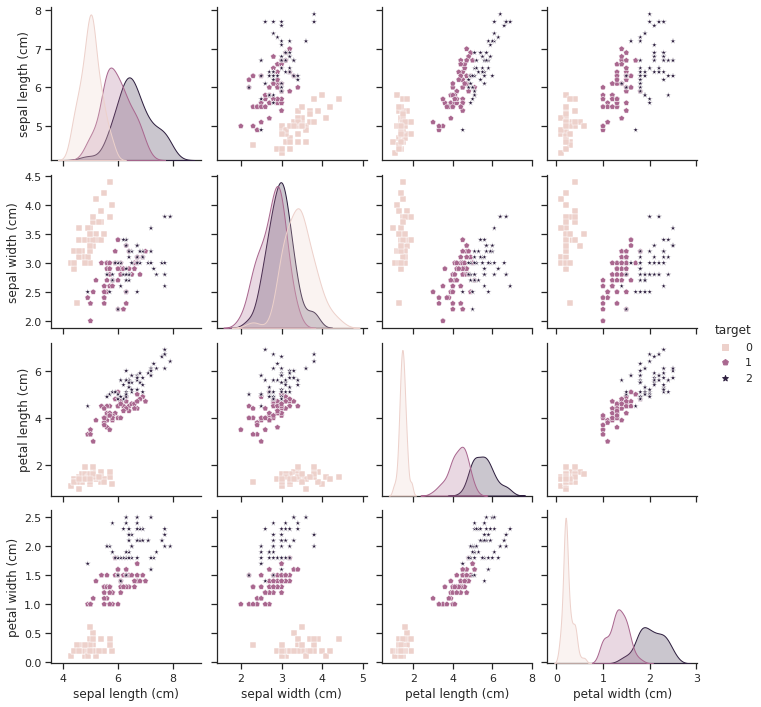

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris_df, 
                 hue = 'target',
                 vars=['sepal length (cm)',
                       'sepal width (cm)',
                       'petal length (cm)',
                       'petal width (cm)',
                      ],
#                  palette=sns.hls_palette(6, l=.6, s=.8),
                 markers=['s','p','*'])

In [25]:
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Clean

In fact, in this case (the sklearn toy dataset) we have nothing to clean, but let's pretend we don't know that and find by ourselves (as this will be the usual step in the real-world datasets)

In [35]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

No null(NaN) values - we are good to go

## Select features

Curent dataset is perfectly suited for our needs, and the 4 features are good. But we will simplyfy them, in order to make some 2D (and not 4d :) ) visualizations. So let's select only 2 features: the 'sepal length (cm)', 'sepal width (cm)' of an item 

In [37]:
# assign the feature (X) matrix and target(y) vector:

# note, the convention to name matrix with upper letter
X = iris.data[:, [0, 1]]
y = iris.target


# look at the data
print(f'shape of X: \n{X.shape}')
print(f'shape of y: \n{y.shape}')
print(f'\nFirst 5 rows of X: \n{X[:5]}')
print(f'\nValues of y with step 10 :\n{y[0::10]}')

shape of X: 
(150, 2)
shape of y: 
(150,)

First 5 rows of X: 
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

Values of y with step 10 :
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


## Separate the training data from the test data

We don't want to test our classifier on data, which it already knows, i.e. the training data, but to see how it will performs on unseen data. We want a model, that is able to **learn**, i.e. to be able to  **generalize**, not just to remember.

So lets separate the Iris Dataset into two sets: a Training Dataset and a Test Dataset. We can split the Iris Dataset manually, but we have to be sure that we had randomize the order of the samples, as the dataset may come (and this is exactly the case with Iris Dataset) ordered, which would bias the tests. Instead of doing that manually, we can use the scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=42)

# if you need the random state not to be preserved during the executions, set random_state=None

train_test_split() default values for X_train is 75% of the rows of the dataset. The remaining 25% are left for X_test (same defaults are for y values).

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 2)
(38, 2)
(112,)
(38,)


### Let's visualize the data

### TODO: send mail as HW with this

We'll assign manually a different color for each of our input points, depending on their class ('setosa' or 'versicolor' or 'virginica'). We'll use the Boolean Indexing (masking) features of the numpy arrays. Check: [NDArrays.ipynb - Masking example 2 and 3](https://nbviewer.jupyter.org/github/ProgressBG-Python-Course/JupyterNotebooksExamples/blob/master/Notebooks/numpy_and_pandas/NDArrays.ipynb#Masking-example-2-:-map-list-elements-to-array-of-indexes)

Text(0, 0.5, 'Sepal width')

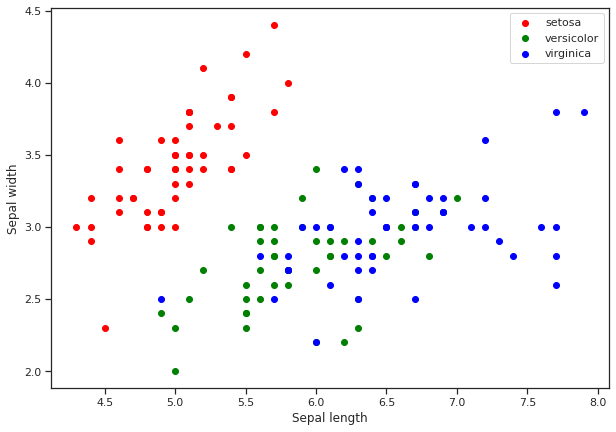

In [43]:
plt.figure(figsize=(10,7))

colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    # for each iteration we plot data with color coresponding to the target classes as indexes
    xs = X[y == i, 0]
    ys = X[y == i, 1]
    
    plt.scatter(xs, ys, c=colors[i])
    
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

## Choose the model

Looking at our data, we can see, that there is clearly separated 3 classes. So, we'll start with most simple algorithm for Classification - the k-Neareast Neighbour (kNN), which hapilly is included into the scikit-learn package.

In [44]:
# Import the sklearn class for the algorithm we decided to use
from sklearn.neighbors import KNeighborsClassifier

###  Instantiate the "estimator"

- In scikit-learn's an "Estimator" is the term for model.


In [78]:
# the default value for k is 5
knn = KNeighborsClassifier(n_neighbors=6)

## Train the model (fit the model)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

#### plot decision regions

In [80]:
# # just a demo - not connected with our case
# plt.figure(figsize=(10,8))
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X, y,
#                       clf=knn)

# plt.xlabel('sepal length')
# plt.ylabel('sepal width')
# plt.legend(loc='upper left')
# plt.show()


## Predict (classify unknown input sample)

We can only hope, that the model is fitted well. But let's not hope, let's check

In [81]:
# test_data = [7.5, 3.5]
test_data = [4.6, 1.8]

# let's predict its class:
knn.predict([test_data])


array([1])

In [82]:
(knn.predict(X_test) != y_test).sum()

6

## Evaluate the model

In [83]:
knn.score(X_test, y_test)

0.8421052631578947